# DA projects
## _Incidence of respiratory disease in Argentina (2018-2021)_



The objective of this project is to analyse the information supplied by Argentina's Ministry of Health (https://www.datos.gob.ar) about the prevalence of respiratory disease in the country, trying to find interesting information to draw conclusions from.
As a side note, it was a good opportunity to put into practice some data extraction, processing and visualization techniques in Python.

First we import the libraries that will be used along the way to process the information and set the style for the graphs. Knowing that only three types of diseases are considered, we set the palette colors so they remain the same for the rest of the project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
palette = {'Enfermedad tipo influenza (ETI)':'b', 'Neumonía (sin especificar)':'r', 'Bronquiolitis en menores de 2 años (sin especificar)':'g', 'Neumonia':'r', 'Bronquiolitis en menores de 2 anos':'g'}

Then comes the time to import the data from the online repository and get a first glimpse of what it contains:

In [2]:
data_cln = pd.read_csv('http://datos.salud.gob.ar/dataset/c553d917-36f4-4063-ac02-1686a9120e1c/resource/b7db0713-1c13-45b1-9b4f-6dec194d67b0/download/informacion-publica-respiratorias-nacional.csv')
data_cln.head()
#data = pd.read_csv('datasets/respiratorias.csv')
#data.head()

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),5,5 a 9,1
1,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),9,25 a 34,1
2,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),3,12 a 23 m,1
3,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),4,2 a 4,2
4,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),5,5 a 9,1


During the first iteration of this project, the data was downloaded and handled locally to prevent long loading times. Moreover, the data structure wasn't properly established in the csv file, so both the columns and row information had to be preprocessed (hence the data_cln name for the DataFrame). All this process has been commented out as the online file has been corrected.
Anyway, for the sake of spelling, I corrected the column names corresponding to the year and the epidemiological week.

In [3]:
data_cln = data_cln.rename(columns = {'anio':'año','semanas_epidemiologicas':'semanas_epidemiológicas'})
list(data_cln.columns)
#columns = data.columns[0].split(',')
#clean_cols = []
#for col in columns:
#    col = col.replace('"', '')
#    clean_cols.append(col)
#clean_cols[4] = 'año'
#clean_cols[5] = 'semanas_epidemiológicas'
#clean_cols

['departamento_id',
 'departamento_nombre',
 'provincia_id',
 'provincia_nombre',
 'año',
 'semanas_epidemiológicas',
 'evento_nombre',
 'grupo_edad_id',
 'grupo_edad_desc',
 'cantidad_casos']

In [4]:
#rows = []
#def clean_str(s):
#    s = str(s)
#    s = s.split(',')
#    return s
#for row in data.itertuples():
#    r = row[1].replace('"', '').split(',')
#    rows.append(r)
#print(rows[:10])

In [5]:

#data_cln = pd.DataFrame.from_records(rows, columns=clean_cols)
#data_cln.head()

We can see that some location names have encoding issues and the accents on vowels don't show up.

In [6]:
data_cln[data_cln['departamento_nombre'].str.contains('?', regex=False)]['departamento_nombre'].unique()

array(['GENERAL SAN MART?N', 'UNI?N', 'CURUZ? CUATI?',
       'LIBERTADOR GENERAL SAN MART?N', 'R?O GRANDE', 'A?ELO', 'Z?RATE',
       'RAM?N LISTA', 'SAN MART?N', 'LIBERTADOR GRL. SAN MART?N',
       'SAN ANDR?S DE GILES', 'TAF? DEL VALLE', 'SANTA MAR?A', 'JUN?N',
       'PEHUAJ?', 'R?O SEGUNDO', 'L?CAR', 'FEDERACI?N', 'OR?N', 'PARAN?',
       'PILAG?S', 'JU?REZ CELMAN', 'PRESIDENTE PER?N', 'IGUAZ?',
       'PRESIDENTE ROQUE S?ENZ PE?A', 'LA VI?A', 'J?CHAL', 'PIRAN?',
       'ROSARIO VERA PE?ALOZA', 'GENERAL L?PEZ', 'LAN?S', 'SAN CRIST?BAL',
       'PALPAL?', 'ULL?M', 'PATI?O', 'MARCOS JU?REZ',
       'COMANDANTE FERN?NDEZ', 'OLAVARR?A', 'TAF? VIEJO', 'LOBER?A',
       'CONCEPCI?N', 'GUAYMALL?N', 'MAIP?', 'LUJ?N', 'R?O PRIMERO',
       'GUATRACH?', 'SANTA B?RBARA', 'GRL. JOS? DE SAN MART?N',
       'TAPALQU?', 'CAPAY?N', 'GUASAY?N', 'GUALEGUAYCH?', 'VALLE F?RTIL',
       'FRAY JUSTO SANTA MAR?A DE ORO', 'GENERAL G?EMES', 'ITAT?',
       'MOR?N', 'ITUZAING?', 'FUTALEUF?', 'ALUMIN?', 'B

Then we check for the null values count and the data type of each column:

In [7]:
data_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203730 entries, 0 to 203729
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          203730 non-null  int64 
 1   departamento_nombre      203730 non-null  object
 2   provincia_id             203730 non-null  int64 
 3   provincia_nombre         203730 non-null  object
 4   año                      203730 non-null  int64 
 5   semanas_epidemiológicas  203730 non-null  int64 
 6   evento_nombre            203730 non-null  object
 7   grupo_edad_id            203730 non-null  int64 
 8   grupo_edad_desc          203730 non-null  object
 9   cantidad_casos           203730 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.5+ MB


Originally, both the epidemiological week and the number of cases columns had to be converted to integer type. Then, if we obtain the total count for each type of disease in the data and the unique age groups:

In [8]:
data_cln['semanas_epidemiológicas'] = data_cln['semanas_epidemiológicas'].astype(int)
data_cln['cantidad_casos'] = data_cln['cantidad_casos'].astype(int)

print('Events:\n',data_cln['evento_nombre'].value_counts(), '\n')
print('Number of unique locations: ',len(data_cln['departamento_nombre'].unique()), '\n')
print('Unique age categories:\n',data_cln['grupo_edad_desc'].unique(), '\n')
print('Unique age ids:\n',data_cln['grupo_edad_id'].unique(), '\n')
print('Number of groups: ',len(data_cln['grupo_edad_desc'].unique()))
print('Number of ids: ',len(data_cln['grupo_edad_id'].unique()))
print('Years: ',data_cln['año'].value_counts())

Events:
 Enfermedad tipo influenza (ETI)                         159504
Neumonía (sin especificar)                               28214
Bronquiolitis en menores de 2 años (sin especificar)     16012
Name: evento_nombre, dtype: int64 

Number of unique locations:  396 

Unique age categories:
 ['5 a 9' '25 a 34' '12 a 23 m' '2 a 4' '35 a 44' '6 a 11 m' '10 a 14'
 '15 a 19' '20 a 24' '45 a 64' '< 6 m' '>= a 75' '65 a 74' 'Edad Sin Esp.'] 

Unique age ids:
 [ 5  9  3  4 10  2  6  7  8 11  1 13 12 17] 

Number of groups:  14
Number of ids:  14
Years:  2020    184445
2021     19285
Name: año, dtype: int64


We can see that most recorded events correspond to the year 2020, and that the vast majority of them are influenza type cases.
With this in mind, we set a custom order according to the different age groups, to make sure the date gets displayed respecting this order in the graphs. Then we create a barplot to show the incidence of each tipe of disease on every age group.
We're particularly interested in pneumonia and influenza related diseases, because bronchiolitis affects mostly children of 2 years old and under so the data collection for it is restricted to that age interval.

In [9]:
custom_order = {'< 6 m':0, '6 a 11 m':1, '12 a 23 m':2, '2 a 4':3, '5 a 9':4, '10 a 14':5, '15 a 19':6, '20 a 24':7, '25 a 34':8, '35 a 44':9, '45 a 64':10, '65 a 74':11, '>= a 75':12, 'Edad Sin Esp.':14 }

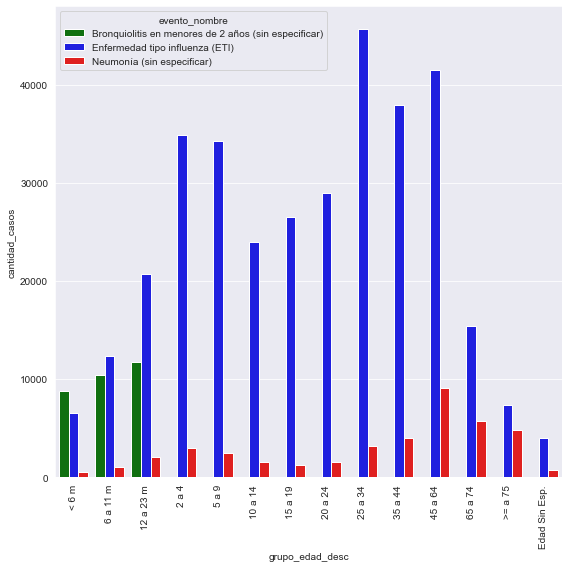

In [10]:
age_group_data = data_cln.loc[data_cln['año'] == 2020].groupby(['grupo_edad_desc','evento_nombre']).sum().sort_values(by='grupo_edad_desc', key = lambda x: x.map(custom_order))
age_group_data.reset_index(inplace=True)
age_group_data.head()
fig = plt.figure(figsize=(8,8))
sns.barplot(x='grupo_edad_desc', y='cantidad_casos', hue='evento_nombre', palette=palette, data=age_group_data)
plt.xticks(rotation=90)
plt.tight_layout()


According to this data visualization, we can easily see that the prevalence of pneumonia type diseases is higher among people over 45 years of age. On the other hand, influenza is the predominant respiratory disease between 12 months and 64 years of age.

Another interesting approach to the information about the number of events registered for each disease is to check for differences among provinces.

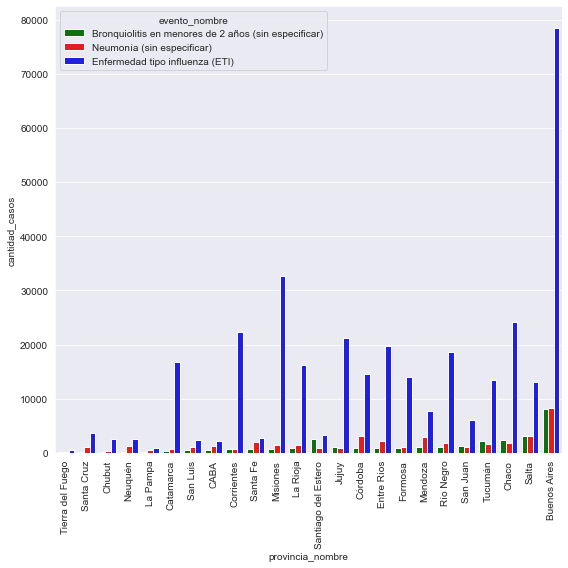

In [11]:
prov_group_data = data_cln.loc[data_cln['año'] == 2020].groupby(['provincia_nombre','evento_nombre']).sum().sort_values(by='cantidad_casos')
prov_group_data.reset_index(inplace=True)
prov_group_data.columns
fig = plt.figure(figsize=(8,8))
sns.barplot(x='provincia_nombre', y='cantidad_casos', hue='evento_nombre', palette=palette, data=prov_group_data)
plt.xticks(rotation=90)
plt.tight_layout()


As expected, the Province of Buenos Aires has by far the highest event count for all the states, considering more than a third of Argentina's population lives there, in densely populated areas. However, this doesn't tell the whole story, considering CABA, Córdoba and Santa Fe don't have that kind of numbers even if they concentrate most of the rest of the population within their borders.

It is then important to take both population and age group distribution by provinces to further our analysis. To do that, we download Argentina's institute of national statistics (INDEC) information about population composition in the country. The data is contained in an excel xls file in a more "visual" way than a clearly organized one, so it needs some exploration and preprocessing.

In [12]:
data_pob = pd.read_excel('https://www.indec.gob.ar/ftp/cuadros/poblacion/n020203.xls')
#data_pob = pd.read_excel('datasets/n020203.xls')
data_pob.head(10)

,"Población por sexo y grupo de edad, según provincia. Total del país. Año 2010",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provincia,Población,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Total,NaN,NaN,NaN,NaN,Varones,NaN,NaN,NaN,NaN,Mujeres,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Grupo de edad,NaN,NaN,NaN,NaN,Grupo de edad,NaN,NaN,NaN,NaN,Grupo de edad,NaN,NaN,NaN
5,NaN,Total,0-14,15-64,65 y más,NaN,Total,0-14,15-64,65 y más,NaN,Total,0-14,15-64,65 y más
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total,40117096,10222317,25790131,4104648,NaN,19523766,5195096,12654528,1674142,NaN,20593330,5027221,13135603,2430506
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ciudad Autónoma de Buenos Aires,2890151,472511,1943569,474071,NaN,1329681,240208,916862,172611,NaN,1560470,232303,1026707,301460


In [13]:
data_pob.head(-1)

,"Población por sexo y grupo de edad, según provincia. Total del país. Año 2010",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provincia,Población,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Total,NaN,NaN,NaN,NaN,Varones,NaN,NaN,NaN,NaN,Mujeres,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Grupo de edad,NaN,NaN,NaN,NaN,Grupo de edad,NaN,NaN,NaN,NaN,Grupo de edad,NaN,NaN,NaN
5,NaN,Total,0-14,15-64,65 y más,NaN,Total,0-14,15-64,65 y más,NaN,Total,0-14,15-64,65 y más
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total,40117096,10222317,25790131,4104648,NaN,19523766,5195096,12654528,1674142,NaN,20593330,5027221,13135603,2430506
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ciudad Autónoma de Buenos Aires,2890151,472511,1943569,474071,NaN,1329681,240208,916862,172611,NaN,1560470,232303,1026707,301460


We rebuild the DataFrame to get a list of provinces with their respective population totals and distribution by age group, and also create a dictionary with total values for the whole country.

In [14]:
data_pob_cols = ['Provincia','Total','0-14','15-64','65 y más']
data_pob = data_pob.iloc[9:35,:5]
data_pob = data_pob.reset_index(drop=True)
data_pob = data_pob.set_axis(data_pob_cols, axis='columns')
tot_pop_byage = {'Total':data_pob['Total'].sum(), '0-14':data_pob['0-14'].sum(), '15-64':data_pob['15-64'].sum(), '65 y más':data_pob['65 y más'].sum()}
data_pob.head(10)



,Provincia,Total,0-14,15-64,65 y más
0,Ciudad Autónoma de Buenos Aires,2890151,472511,1943569,474071
1,Buenos Aires,15625084,3876553,10077275,1671256
2,24 partidos del Gran Buenos Aires,9916715,2487778,6440229,988708
3,Interior de la provincia de Buenos Aires,5708369,1388775,3637046,682548
4,Catamarca,367828,107452,231404,28972
5,Chaco,1055259,320407,661406,73446
6,Chubut,509108,135575,335782,37751
7,Córdoba,3308876,805512,2133846,369518
8,Corrientes,992595,291482,623110,78003
9,Entre Ríos,1235994,324299,784742,126953


Then, we consolidate the data by merging both DataFrames on the corresponding province and adding an extra column indicating the number of events by 100k inhabitants. This way we have a better base of comparison among the different states.

  provincia_nombre                                      evento_nombre  \
0       Santa Cruz  Bronquiolitis en menores de 2 años (sin especi...   
1       Santa Cruz                         Neumonía (sin especificar)   
2       Santa Cruz                    Enfermedad tipo influenza (ETI)   
3           Chubut  Bronquiolitis en menores de 2 años (sin especi...   
4           Chubut                         Neumonía (sin especificar)   

   departamento_id  provincia_id      año  semanas_epidemiológicas  \
0             3388         10374   268660                     1590   
1            13125         48828  1264520                    13285   
2            28133        109746  2842140                    33446   
3             5222          3848   298960                     1813   
4            11781          7852   610040                     5088   

   grupo_edad_id  cantidad_casos   Provincia   Total    0-14   15-64 65 y más  \
0            277             174  Santa Cruz  273964   7700

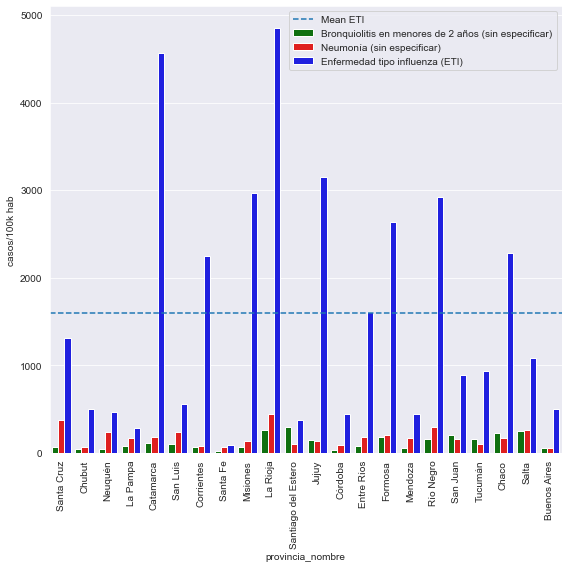

In [15]:
data_cons_prov = pd.merge(prov_group_data, data_pob, how='inner', left_on='provincia_nombre', right_on='Provincia')
data_cons_prov['casos/100k hab'] = data_cons_prov['cantidad_casos']/data_cons_prov['Total']*100000
print(data_cons_prov.head())

fig = plt.figure(figsize=(8,8))
sns.barplot(x='provincia_nombre', y='casos/100k hab', hue='evento_nombre', palette=palette, data=data_cons_prov)
plt.xticks(rotation=90)
plt.axhline(data_cons_prov.loc[data_cons_prov['evento_nombre'] == 'Enfermedad tipo influenza (ETI)','casos/100k hab'].mean(), ls='--', label='Mean ETI')
plt.legend()
plt.tight_layout()

Correcting for population differences, we can see that the provinces with an event count/100k above the country average for influenza type diseases are basically the poorest provinces, located in the north of the country. Worse living and sanitary conditions could explain a higher contagiousness both among family members and the population in general.

In [16]:
#pip install geopandas
#import geopandas
#arg_geojson = geopandas.read_file('/datasets/provincias.geojson')
#arg_geojson.plot()

If we now adecuate the available group age information from the respiratory disease data to match the population data, we can look for differences among groups of age and see if our initial observation changes in some way.

  grupo_edad_desc                                      evento_nombre  \
0            0-14  Bronquiolitis en menores de 2 años (sin especi...   
1            0-14                    Enfermedad tipo influenza (ETI)   
2            0-14                         Neumonía (sin especificar)   
3           15-64                    Enfermedad tipo influenza (ETI)   
4           15-64                         Neumonía (sin especificar)   

   departamento_id  provincia_id        año  semanas_epidemiológicas  \
0          2308785        620770   31049420                   267594   
1          7667963       1950218  115800540                  1335961   
2           963444        267546   14032940                   112101   
3          9158346       2603342  146092460                  1719320   
4          1439671        513252   24530880                   265672   

   grupo_edad_id  cantidad_casos  casos/100k hab  
0          31973           30974      219.691365  
1         231548          132709

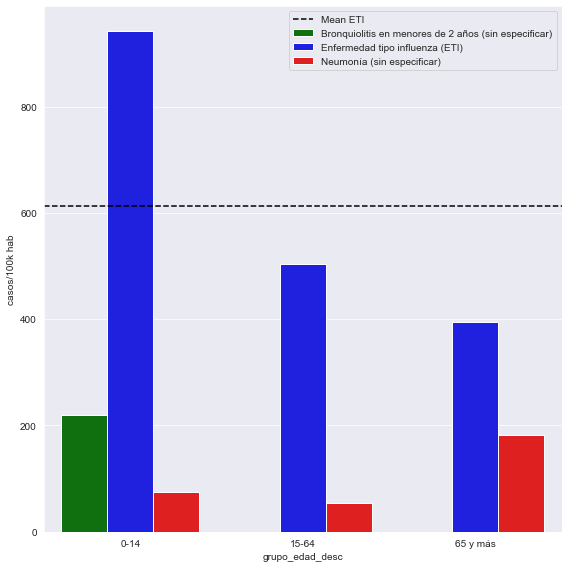

In [17]:
data_cln['grupo_edad_desc'] = data_cln['grupo_edad_desc'].replace(['< 6 m', '6 a 11 m', '12 a 23 m', '2 a 4', '5 a 9', '10 a 14'], '0-14')
data_cln['grupo_edad_desc'] = data_cln['grupo_edad_desc'].replace(['15 a 19', '20 a 24', '25 a 34', '35 a 44', '45 a 64'], '15-64')
data_cln['grupo_edad_desc'] = data_cln['grupo_edad_desc'].replace(['65 a 74', '>= a 75'], '65 y más')
age_regroup_data = data_cln.loc[data_cln['año'] == 2020].groupby(['grupo_edad_desc','evento_nombre']).sum().sort_values(by='grupo_edad_desc', key = lambda x: x.map(custom_order))
age_regroup_data = age_regroup_data.reset_index()
age_regroup_data = age_regroup_data.drop([0,1], axis=0).reset_index(drop=True)

age_regroup_data['casos/100k hab'] = 0
age_regroup_data.loc[age_regroup_data['grupo_edad_desc'] == '0-14', 'casos/100k hab'] = age_regroup_data['cantidad_casos']/tot_pop_byage['0-14']*100000
age_regroup_data.loc[age_regroup_data['grupo_edad_desc'] == '15-64', 'casos/100k hab'] = age_regroup_data['cantidad_casos']/tot_pop_byage['15-64']*100000
age_regroup_data.loc[age_regroup_data['grupo_edad_desc'] == '65 y más', 'casos/100k hab'] = age_regroup_data['cantidad_casos']/tot_pop_byage['65 y más']*100000
print(age_regroup_data.head())
fig = plt.figure(figsize=(8,8))
sns.barplot(x='grupo_edad_desc', y='casos/100k hab', hue='evento_nombre', palette=palette, data=age_regroup_data)
plt.axhline(age_regroup_data.loc[age_regroup_data['evento_nombre'] == 'Enfermedad tipo influenza (ETI)','casos/100k hab'].mean(), c='black', ls='--', label='Mean ETI')
plt.legend()
plt.tight_layout()

We can see again that pneumonia has a higher incidence among people corresponding to the 65 years old and older group, which can be related to a decaying health that makes people more prone to bacterial infections. On the other hand, the most affected group by influenza type diseases are children under 15 years old. This fact could be associated with the nature of the interaction between children in public places like schools or parks, and their lower knowledge and concern regarding basic hygiene practices such as washing hands.

If now we consider the evolution with time of the number of events for each disease in the country, we could expect to observe the typical seasonality involved with respiratory diseases, with a higher incidence during the cold months. This corresponds approximately with the period between mid-March and the beginning of October (epidemiological weeks 10-40).

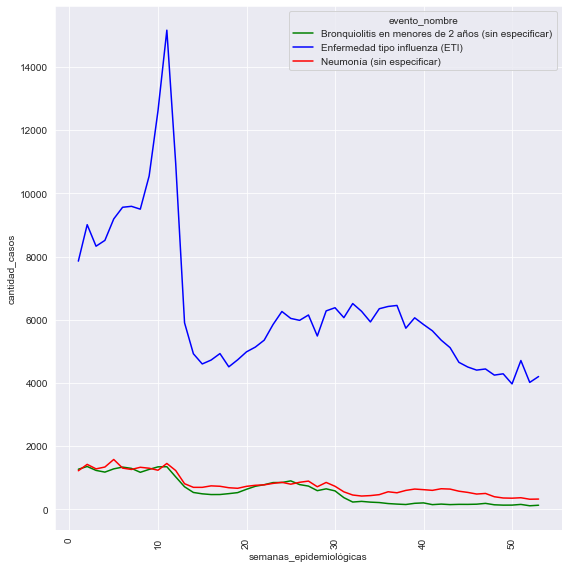

In [18]:
data_temp = data_cln.loc[data_cln['año'] == 2020].groupby(['semanas_epidemiológicas','evento_nombre']).sum().sort_values(by='semanas_epidemiológicas', ascending=True).reset_index()
fig = plt.figure(figsize=(8,8))
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', hue='evento_nombre', palette=palette, data=data_temp)
plt.xticks(rotation=90)
plt.tight_layout()

However, we can see that, even though events start to spike as we get closer to the beginning of the cold weather period, there's a sharp drop in numbers around the 12 epidemiological week. These numbers remain approximately constant for the rest of the year.
It could be a good idea to compare this behavior with the same data for year 2019. After importing and preprocessing the data to make it comparable with 2020's information, we create a lineplot with the number of events on the y-axis and the epidemiological week as the independent variable for both years.

In [19]:
data_2019 = pd.read_csv('http://datos.salud.gob.ar/dataset/c553d917-36f4-4063-ac02-1686a9120e1c/resource/f4096f8b-1692-4d5f-a6d8-09cae47931a4/download/vigilancia-respiratorias-agudas-2018-hasta-20200106.csv')
print(data_2019['evento_nombre'].unique())
data_2019.head()

IncompleteRead: IncompleteRead(687281 bytes read)

In [ ]:
data_2019['cantidad_casos'] = data_2019['cantidad_casos'].astype(int)
data_temp_2019 = data_2019.loc[data_2019['anio'] == 2019].groupby(['semanas_epidemiologicas','evento_nombre']).sum().sort_values(by='semanas_epidemiologicas', ascending=True).reset_index()

fig, ax = plt.subplots(1,3, figsize=(20,8))
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', data=data_temp.loc[data_temp['evento_nombre'] == 'Enfermedad tipo influenza (ETI)'], label='2020', ax = ax[0])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', data=data_temp_2019.loc[data_temp_2019['evento_nombre'] == 'Enfermedad tipo influenza (ETI)'], label='2019', ax = ax[0])
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', data=data_temp.loc[data_temp['evento_nombre'] == 'Neumonía (sin especificar)'], label='2020', ax = ax[1])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', data=data_temp_2019.loc[data_temp_2019['evento_nombre'] == 'Neumonia'], label='2019', ax = ax[1])
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', data=data_temp.loc[data_temp['evento_nombre'] == 'Bronquiolitis en menores de 2 años (sin especificar)'], label='2020', ax = ax[2])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', data=data_temp_2019.loc[data_temp_2019['evento_nombre'] == 'Bronquiolitis en menores de 2 anos'], label='2020', ax = ax[2])
ax[0].set(title='Enfermedad tipo influenza (ETI)', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
ax[1].set(title='Neumonía', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
ax[2].set(title='Bronchiolitis', xlabel='Epidemiological week', ylabel='Nº cases')
for i in ax:
    i.axvline(12, ls='--', c='black', label='Lockdown/social distancing')
    i.axvspan(10, 40, facecolor='g', alpha=0.15, label='aut/win')
    i.legend()
plt.tight_layout()

When we look at the graph for 2019, we can see the expected result regarding the variation in the number of events along the year. This tells us that 2020 was an anomaly that should be explained...
Oh, right! It's hard to forget the COVID-19 pandemic and all the restrictive measures that were taken to control the number of infected people!

If we acknowledge the lockdown/social distancing measures taken by the Argentinian government at the beginning of March 2020, everything makes sense. The spread of all respiratory diseases, not only COVID-19, experienced a strong decline due to the sanitary emergency actions put into place since March.
Despite the fact that social distancing hasn't been seriously enforced after the end of April 2020, the more frequent use of the face mask, hand sanitization and so on resulted in event numbers that are even lower than 2019's minimums.

To confirm this idea, we could compare 2019's numbers with those available for 2021.

In [ ]:
data_2021 = data_cln.loc[data_cln['año'] == 2021].groupby(['semanas_epidemiológicas','evento_nombre']).sum().sort_values(by='semanas_epidemiológicas', ascending=True).reset_index()

fig, ax = plt.subplots(1,3, figsize=(15,8))
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', label='2021', data=data_2021.loc[data_2021['evento_nombre'] == 'Enfermedad tipo influenza (ETI)'], ax = ax[0])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', label='2019', data=data_temp_2019.loc[(data_temp_2019['semanas_epidemiologicas'] <= data_2021['semanas_epidemiológicas'].max())&(data_temp_2019['evento_nombre'] == 'Enfermedad tipo influenza (ETI)')], ax = ax[0])
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', label='2021', data=data_2021.loc[data_2021['evento_nombre'] == 'Neumonía (sin especificar)'], ax = ax[1])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', label='2019', data=data_temp_2019.loc[(data_temp_2019['semanas_epidemiologicas'] <= data_2021['semanas_epidemiológicas'].max())&(data_temp_2019['evento_nombre'] == 'Neumonia')], ax = ax[1])
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', label='2021', data=data_2021.loc[data_2021['evento_nombre'] == 'Bronquiolitis en menores de 2 años (sin especificar)'], ax = ax[2])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', label='2019', data=data_temp_2019.loc[(data_temp_2019['semanas_epidemiologicas'] <= data_2021['semanas_epidemiológicas'].max())&(data_temp_2019['evento_nombre'] == 'Bronquiolitis en menores de 2 anos')], ax = ax[2])
ax[0].set(title='Enfermedad tipo influenza (ETI)', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
ax[1].set(title='Neumonía', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
ax[2].set(title='Bronquiolitis infantil', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
plt.tight_layout()

As we can see, even without a lockdown the baseline of events for all respiratory diseases considered is significantly lower for 2021 than for 2019, 6-10 times lower. An interesting way to continue the analysis would be to add the COVID-19 data to see if this "drop" in the number of events for these diseases has been replaced by COVID events.

The problem with this approach would be that COVID testing and reporting has been dealt with in a more systematic and extensive way. It is fair to assume that most influenza type events don't end up with a person seeking testing or medical assistance (that is, they are never counted), but people with symptoms that could be indicative of a COVID infection are definitely tested and put under observation. COVID-19, being a new and extremely contagious disease, it's hard to compare to other respiratory disease to draw this kind of conclusions.